<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов-как-метод-балансировки-(class_weight)" data-toc-modified-id="Взвешивание-классов-как-метод-балансировки-(class_weight)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов как метод балансировки (class_weight)</a></span></li><li><span><a href="#Увеличение-выборки-как-метод-балансировки-(oversampling)" data-toc-modified-id="Увеличение-выборки-как-метод-балансировки-(oversampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки как метод балансировки (oversampling)</a></span></li><li><span><a href="#Уменьшение-выборки-как-метод-балансировки-(undersampling)" data-toc-modified-id="Уменьшение-выборки-как-метод-балансировки-(undersampling)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки как метод балансировки (undersampling)</a></span></li><li><span><a href="#Визуализация-результатов-исследования-и-борьбы-с-дисбалансом" data-toc-modified-id="Визуализация-результатов-исследования-и-борьбы-с-дисбалансом-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Визуализация результатов исследования и борьбы с дисбалансом</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

**Загружаем библиотеки для работы**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

**Считываем данные из csv-файла и сохраняем в переменную data**

In [2]:
# Загрузка данных
data = pd.read_csv('/datasets/Churn.csv')
pd.set_option('display.max_columns', None) # увеличиваем максимальное количество отображающихся столбцов

# Описание данных
display(data.head()) # Вывод первых 5 строк данных
display(data.info()) # Общая информация о данных
display(data.describe()) # Статистические характеристики данных

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Проверка на пробелы в названиях колонок**

In [3]:
# Сначала проверим, есть ли пробелы в названиях колонок:
columns_with_spaces = [col for col in data.columns if ' ' in col]
if columns_with_spaces:
    print('data: есть пробел в названии столбца:', ', '.join(columns_with_spaces))
else:
    print('data: в названиях столбцов нет пробелов')

data: в названиях столбцов нет пробелов


**Переименование столбцов в строчные символы и «змеиный_регистр»**

In [4]:
data = data.rename(columns={'RowNumber': 'row_number', 'CustomerId': 'customer_id', 'Surname': 'surname', 
                            'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender', 
                            'Age': 'age', 'Tenure': 'tenure', 'Balance': 'balance', 'NumOfProducts': 'num_of_products', 
                            'HasCrCard': 'has_cr_card', 'IsActiveMember': 'is_active_member', 
                            'EstimatedSalary': 'estimated_salary', 'Exited': 'exited'})
display(data.columns) # проверка результатов - перечень названий столбцов

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

**Посмотрим размерность датафрейма и наличие пропущеных данных**

In [5]:
display(data.shape)
display(print(''))
display(data.isna().sum())

(10000, 14)

None

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

**Подсчет количества пропущенных значений в сроках клиентства**

In [6]:
filtered_data = data[data['exited'] == 1]

# Подсчет пропущенных значений в колонке tenure
missing_values_count = filtered_data['tenure'].isnull().sum()

# Вывод результата
if missing_values_count > 0:
    print("Пропущенных значений в сроках клиентства в банке:", missing_values_count)
else:
    print("Нет пропусков в сроках клиентства.")

Пропущенных значений в сроках клиентства в банке: 183


**Проведем анализ о зависимости срока клиентства в банке и уходом из банка**

In [7]:
# Выведем на экран общее количество строк об ушедших клиентах
filtered_data = data[data['exited'] == 1]
total_rows = len(filtered_data)
display(total_rows)

# Таблица с добавлением пропущенных значений в 'tenure' и подсчетом их количества и процента от общего числа
grouped_data = filtered_data.groupby('tenure').size().reset_index(name='count')

# Подсчет пропущенных значений в колонке tenure
missing_values_count = filtered_data['tenure'].isnull().sum()

grouped_data = grouped_data.append({'tenure': 'no_data', 'count': missing_values_count}, 
                                   ignore_index=True)
total_count = grouped_data['count'].sum()
grouped_data['percentage'] = grouped_data['count'] / total_count * 100

# Округлим проценты до 2 знаков после запятой
grouped_data['percentage'] = grouped_data['percentage'].round(2)

# Добавим итоговую строку для подтверждения что все строки учтены
total = grouped_data['count'].sum()
total_percentage = grouped_data['percentage'].sum()
grouped_data = grouped_data.append({'tenure': 'Total', 'count': total, 'percentage': total_percentage}, 
                                   ignore_index=True)

# Вывод таблицы
print(grouped_data[['tenure', 'count', 'percentage']])

# Проверка на охват данных
print('')
if total_rows == total:
    print("Все строки учтены")
elif total_rows > total:
    print("Есть ошибка. Не все данные учтены")
else:
    print("Есть ошибка в учете данных")

2037

     tenure  count  percentage
0       0.0     90        4.42
1       1.0    213       10.46
2       2.0    185        9.08
3       3.0    198        9.72
4       4.0    184        9.03
5       5.0    187        9.18
6       6.0    177        8.69
7       7.0    160        7.85
8       8.0    174        8.54
9       9.0    194        9.52
10     10.0     92        4.52
11  no_data    183        8.98
12    Total   2037       99.99

Все строки учтены


**Промежуточный вывод:**
<br>В данном случае, процентная доля уходящих клиентов находится на относительно стабильном уровне в диапазоне от 8.54% до 10.46% в зависимости от срока клиентства. Нет явно выраженной трендовой зависимости между сроком клиентства и уходом из банка.

На основании предоставленных данных, можно сделать вывод, что срок клиентства клиентов банка не имеет существенного влияния на вероятность их ухода из банка. Пропуски допусимо заполнить медианной величиной.

**Пропуски в столбце 'tenure' заполняем медианным значением**

In [8]:
data['tenure'].fillna(data['tenure'].median(), inplace=True)

**Повторно посмотрим наличие пропущеных данных**

In [9]:
display(data.isna().sum())

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

**Проверим датафрейм на дубликаты**

In [10]:
data.duplicated().sum()

0

**Определим соотношение действующих клиентов банка и ушедших по значениям в столбце 'exited'**

In [11]:
# Подсчет количества строк с значениями 0 и 1
counts = data['exited'].value_counts()

# Создание датафрейма с результатами
result = pd.DataFrame({'Client': counts.index,
                       'Count': counts.values,
                       'Percentage': counts.values / len(data) * 100})

# Определяем функцию для округления до двух знаков после запятой
def round_percentage(value):
    return round(value, 2)

# Применяем функцию округления к каждому элементу серии 'Percentage'
result['Percentage'] = result['Percentage'].apply(round_percentage)

# Выводим на экран обновленную таблицу result
result

,Client,Count,Percentage
0,0,7963,79.63
1,1,2037,20.37


**Визуализация таблицы**

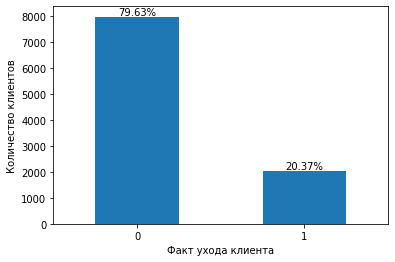

In [12]:
counts.plot(kind='bar')
plt.xlabel("Факт ухода клиента")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)
# plt.show()

# Отображение процентного количества над каждым столбцом
for i, count in enumerate(counts):
    percentage = count / len(data) * 100
    plt.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center', va='bottom')

plt.show()

**Вывод:**
- Файл успешно загружен и содержит информацию о поведении клиентов банка.
- Всего доступно 14 столбцов, которые содержат различную информацию о клиентах, включая их идентификаторы, кредитный рейтинг, пол, возраст, количество продуктов, баланс и прочее.
- Столбец "Tenure" (сколько лет человек является клиентом банка) содержит пропущенные значения, которые были заменены на 0.
- В данных нет дубликатов.
- Из представленного набора данных видно, что около 79.6% клиентов остаются в банке, в то время как 20.4% клиентов уходят.
- Это соотношение предполагает, что у банка есть проблемы с удержанием клиентов, поскольку значительное количество клиентов покидает его.

<br>Отток клиентов может быть обусловлен различными факторами, такими как уровень обслуживания, конкуренция, стоимость услуг, качество продуктов и другие. 
<br>Первоначальная предобработка данных выполнена. Необходимо провести анализ дальше для определения факторов, влияющих на отток клиентов в банке.

## Исследование задачи

Целевым признаком являются значения в столбце Exited — факт ухода клиента.

**Удалим столбцы-идентификаторы, не представляющие ценности для алгоритма**

In [13]:
#Обозначим новый датафрейм "data_ml" — данные для машинного обучения
data_ml = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
display(data_ml.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


**Определение объектов характеристик (features) и целевой переменной (target)**

In [14]:
features = data_ml.drop('exited', axis=1)
target = data_ml['exited']

**Определение категориальных и числовых признаков. Применение One-Hot Encoding к категориальным признакам с учетом дамми-ловушки**

In [15]:
# Определение категориальных и числовых признаков
categorical_features = ['geography', 'gender']
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 
                    'has_cr_card', 'is_active_member', 'estimated_salary']

# Применение One-Hot Encoding к категориальным признакам с учетом дамми-ловушки
categorical_transformer = OneHotEncoder(drop='first')
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)])

**Разделение данных на обучающую, валидационную и тестовую выборки с применением препроцессора**

In [16]:
# Разделение данных на обучающую и тестовую выборки с применением препроцессора
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

# Разделение обучающей выборки на новую обучающую выборку и валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.2, random_state=12345)

features_train_preprocessed = preprocessor.fit_transform(features_train)
features_valid_preprocessed = preprocessor.transform(features_valid)
features_test_preprocessed = preprocessor.transform(features_test)

print("Размер новой обучающей выборки:", features_train_preprocessed.shape[0], "записей,", 
      round(features_train_preprocessed.shape[0] / len(features) * 100, 2), "% от датасета")
print("Размер валидационной выборки:", features_valid_preprocessed.shape[0], "записей,", 
      round(features_valid_preprocessed.shape[0] / len(features) * 100, 2), "% от датасета")
print("Размер тестовой выборки:", features_test_preprocessed.shape[0], "записей,", 
      round(features_test_preprocessed.shape[0] / len(features) * 100, 2), "% от датасета")

Размер новой обучающей выборки: 6000 записей, 60.0 % от датасета
Размер валидационной выборки: 1500 записей, 15.0 % от датасета
Размер тестовой выборки: 2500 записей, 25.0 % от датасета


Сначала мы обучим модели без учета дисбаланса классов, а затем применим различные методы балансировки и сравним результаты.

**Напишем функцию для обучения модели и вычисления метрик**

In [17]:
def train_and_evaluate_model(model, features_train, target_train, features_valid, target_valid):
    # Обучаем модель
    model.fit(features_train, target_train)

    # Предсказываем на валидационных данных
    predicted = model.predict(features_valid)

    # Вычисляем метрику F1
    f1 = f1_score(target_valid, predicted)

    # Вычисляем метрику AUC-ROC
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

    return f1, auc_roc

**Модели**

1.	Дерево решений (Decision Tree)

In [18]:
# Создаем экземпляр модели с измененным гиперпараметром max_depth
tree_model = DecisionTreeClassifier(max_depth=5, random_state=12345)

# Обучаем модель и вычисляем метрики
f1_tree, auc_roc_tree = train_and_evaluate_model(tree_model, features_train_preprocessed, 
                                                 target_train, features_valid_preprocessed, target_valid)

print("Значение F1 для модели Decision Tree с гиперпараметром max_depth=5:", f1_tree)
print("Значение AUC-ROC для модели Decision Tree с гиперпараметром max_depth=5:", auc_roc_tree)

Значение F1 для модели Decision Tree с гиперпараметром max_depth=5: 0.5333333333333334
Значение AUC-ROC для модели Decision Tree с гиперпараметром max_depth=5: 0.8298240300287469


2.	Логистическая регрессия (Logistic Regression)

In [19]:
# Создаем экземпляр модели с измененным гиперпараметром C
logreg_model = LogisticRegression(C=0.1, random_state=12345)

# Обучаем модель и вычисляем метрики
f1_logreg, auc_roc_logreg = train_and_evaluate_model(logreg_model, features_train_preprocessed, 
                                                         target_train, features_valid_preprocessed, target_valid)

print("Значение F1 для модели Logistic Regression с гиперпараметром C=0.1:", f1_logreg)
print("Значение AUC-ROC для модели Logistic Regression с гиперпараметром C=0.1:", auc_roc_logreg)

Значение F1 для модели Logistic Regression с гиперпараметром C=0.1: 0.33573141486810554
Значение AUC-ROC для модели Logistic Regression с гиперпараметром C=0.1: 0.7848552784230581


3.	Случайный лес (Random Forest)

In [20]:
# Создаем экземпляр модели с измененным гиперпараметром n_estimators
forest_model = RandomForestClassifier(n_estimators=100, random_state=12345)

# Обучаем модель и вычисляем метрики
f1_forest, auc_roc_forest = train_and_evaluate_model(forest_model, features_train_preprocessed, 
                                                     target_train, features_valid_preprocessed, target_valid)

print("Значение F1 для модели Random Forest с гиперпараметром n_estimators=100:", f1_forest)
print("Значение AUC-ROC для модели Random Forest с гиперпараметром n_estimators=100:", auc_roc_forest)

Значение F1 для модели Random Forest с гиперпараметром n_estimators=100: 0.5725806451612904
Значение AUC-ROC для модели Random Forest с гиперпараметром n_estimators=100: 0.8513923181143331


4.	Градиентный бустинг (Gradient Boosting)

In [21]:
# Создаем экземпляр модели с измененным гиперпараметром learning_rate
gb_model = GradientBoostingClassifier(learning_rate=0.2, random_state=12345)

# Обучаем модель и вычисляем метрики
f1_gb, auc_roc_gb = train_and_evaluate_model(gb_model, features_train_preprocessed, 
                                             target_train, features_valid_preprocessed, target_valid)

print("Значение F1 для модели Gradient Boosting с гиперпараметром learning_rate=0.2:", f1_gb)
print("Значение AUC-ROC для модели Gradient Boosting с гиперпараметром learning_rate=0.2:", auc_roc_gb)

Значение F1 для модели Gradient Boosting с гиперпараметром learning_rate=0.2: 0.5973025048169558
Значение AUC-ROC для модели Gradient Boosting с гиперпараметром learning_rate=0.2: 0.864592094196804


**Функция для округления значений в таблице до 2 знаков после запятой**

In [22]:
def round_values(df):
    return df.round(2)

**Соберем все полученные значения метрик без учета дисбаланса в один датафрейм**

In [23]:
# Создаем таблицу с метриками без учета дисбаланса
df_metrics_0 = pd.DataFrame({'Параметр': ['Значение F1', 'Значение AUC-ROC'],
                           'Decision Tree': [f1_tree, auc_roc_tree],
                           'Logistic Regression': [f1_logreg, auc_roc_logreg],
                           'Random Forest': [f1_forest, auc_roc_forest],
                           'Gradient Boosting': [f1_gb, auc_roc_gb]})

# Округляем значения в таблице
df_metrics_0 = round_values(df_metrics_0)

# Устанавливаем параметры вывода таблицы
# pd.set_option('display.max_columns', len(df_metrics_0.columns))

# Выводим таблицу на экран
df_metrics_0

,Параметр,Decision Tree,Logistic Regression,Random Forest,Gradient Boosting
0,Значение F1,0.53,0.34,0.57,0.60
1,Значение AUC-ROC,0.83,0.78,0.85,0.86


**Вывод**
<br>В ходе исследования были обучены четыре модели машинного обучения: Дерево решений, Логистическая регрессия, Случайный лес и Градиентный бустинг. Эти модели были обучены без учета дисбаланса классов. 

Вот результаты, полученные для каждой модели:

1. Дерево решений: F1 = 0.53, AUC-ROC = 0.83
2. Логистическая регрессия: F1 = 0.34, AUC-ROC = 0.78
3. Случайный лес: F1 = 0.57, AUC-ROC = 0.85
4. Градиентный бустинг: F1 = 0.60, AUC-ROC = 0.86

Целью исследования было достижение метрики F1 не менее 0.59. Из всех моделей, только модель Градиентного бустинга достигла этого значения. Однако, стоит отметить, что это было достигнуто без учета дисбаланса классов. 

В следующем шаге исследования, мы можем применить различные методы балансировки классов, такие как взвешивание классов, увеличение выборки, уменьшение выборки, чтобы улучшить производительность моделей и возможно достичь еще более высокого значения метрики F1. 

В этом исследовании, модель Градиентного бустинга показала наивысшее значение AUC-ROC, что делает ее наиболее предпочтительной моделью из всех рассмотренных.

## Борьба с дисбалансом

**Визуализация баланса классов**

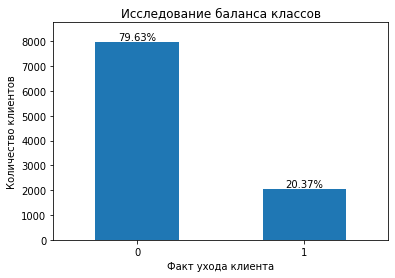

In [24]:
ax = counts.plot(kind='bar')
plt.xlabel("Факт ухода клиента")
plt.ylabel("Количество клиентов")
plt.xticks(rotation=0)

# Отображение процентного количества над каждым столбцом
for i, count in enumerate(counts):
    percentage = count / len(data) * 100
    plt.annotate(f'{percentage:.2f}%', xy=(i, count), ha='center', va='bottom')

# Ограничения по осям x и y
plt.xlim(-0.5, len(counts) - 0.5)
plt.ylim(0, max(counts) * 1.1)

# Название графика
plt.title("Исследование баланса классов")

plt.show()

**Промежуточный вывод**
<br>По результатам анализа баланса значений целевого параметра 'exited' можно сделать следующие выводы:

- Большая часть клиентов (примерно 79.6%) остаются в банке, в то время как 20.4% клиентов уходят.
- Классы в целевой переменной несбалансированы, что может повлиять на качество модели. Модель может быть смещена в сторону прогнозирования большего класса и показывать низкую точность в прогнозировании ухода клиентов.
- Для улучшения качества модели важно принять меры для справедливого учета классов с помощью методов балансировки классов, таких как взвешивание классов или сэмплинг данных.
- Также важным фактором является выбор подхода к оценке модели. Точность (accuracy) может быть неинформативной метрикой в случае дисбаланса классов, и может быть полезно использовать другие метрики, такие как точность, полнота, F1-мера, или использовать ROC-кривую и AUC-ROC для оценки модели.

### Взвешивание классов как метод балансировки (class_weight)

**Модели**

 - взвешивания классов для модели Дерево решений (Decision Tree)

In [25]:
# Создаем экземпляр модели с применением взвешивания классов и измененным гиперпараметром max_depth
tree_model_weighted = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=5)

# Обучаем модель и вычисляем метрики
f1_tree_weighted, auc_roc_tree_weighted = train_and_evaluate_model(tree_model_weighted, features_train_preprocessed, 
                                                 target_train, features_valid_preprocessed, target_valid)

# Выводим значения метрик
print("Значение F1 для модели Decision Tree с взвешиванием классов и max_depth=5:", f1_tree_weighted)
print("Значение AUC-ROC для модели Decision Tree с взвешиванием классов и max_depth=5:", auc_roc_tree_weighted)

Значение F1 для модели Decision Tree с взвешиванием классов и max_depth=5: 0.5568181818181818
Значение AUC-ROC для модели Decision Tree с взвешиванием классов и max_depth=5: 0.8377138777486012


 - взвешивания классов для модели Логистическая регрессия (Logistic Regression)

In [26]:
# Создаем экземпляр модели с применением взвешивания классов и измененным гиперпараметром C
logistic_model_weighted = LogisticRegression(random_state=12345, class_weight='balanced', C=0.1)

# Обучаем модель и вычисляем метрики
f1_logistic_weighted, auc_roc_logistic_weighted = train_and_evaluate_model(logistic_model_weighted, 
                                                                           features_train_preprocessed, 
                                                                           target_train, features_valid_preprocessed, 
                                                                           target_valid)

# Выводим значения метрик
print("Значение F1 для модели Logistic Regression с взвешиванием классов и C=0.1:", f1_logistic_weighted)
print("Значение AUC-ROC для модели Logistic Regression с взвешиванием классов и C=0.1:", auc_roc_logistic_weighted)

Значение F1 для модели Logistic Regression с взвешиванием классов и C=0.1: 0.5097142857142857
Значение AUC-ROC для модели Logistic Regression с взвешиванием классов и C=0.1: 0.78849529043023


 - взвешивания классов для модели Случайный лес (Random Forest)

In [27]:
# Создаем экземпляр модели с применением взвешивания классов и измененным гиперпараметром n_estimators
forest_model_weighted_100 = RandomForestClassifier(random_state=12345, class_weight='balanced', n_estimators=100)

# Обучаем модель и вычисляем метрики
f1_forest_weighted_100, auc_roc_forest_weighted_100 = train_and_evaluate_model(forest_model_weighted_100, 
                                                                               features_train_preprocessed, 
                                                                               target_train, features_valid_preprocessed, 
                                                                               target_valid)

# Выводим значения метрик
print("Значение F1 для модели Random Forest с взвешиванием классов и n_estimators=100:", f1_forest_weighted_100)
print("Значение AUC-ROC для модели Random Forest с взвешиванием классов и n_estimators=100:", auc_roc_forest_weighted_100)

Значение F1 для модели Random Forest с взвешиванием классов и n_estimators=100: 0.5626283367556468
Значение AUC-ROC для модели Random Forest с взвешиванием классов и n_estimators=100: 0.8568590969200521


 - взвешивания классов для модели Градиентный бустинг (Gradient Boosting)

Классификатор GradientBoostingClassifier не поддерживает параметр class_weight. Вместо него можно использовать другой метод балансировки классов.

Один из способов справиться с несбалансированными классами - это использовать параметр sample_weight при обучении модели. Для этого нужно создать массив с весами для каждого объекта в обучающем наборе данных. Вес равен единице для объектов меньшего класса и отношению количества объектов одного класса к другому для объектов большего класса.

In [28]:
# Создаем экземпляр модели с измененными гиперпараметрами learning_rate
boosting_model_weighted_lr = GradientBoostingClassifier(random_state=12345, learning_rate=0.2)

# Считаем количество объектов каждого класса
class_counts = target_train.value_counts()

# Создаем массив с весами для каждого объекта
sample_weights = np.where(target_train == 0, 1, class_counts[0] / class_counts[1])

# Обучаем модель с применением взвешивания классов и новым learning_rate
boosting_model_weighted_lr.fit(features_train_preprocessed, target_train, sample_weight=sample_weights)

# Предсказываем на тестовых данных
boosting_predicted_lr = boosting_model_weighted_lr.predict(features_test_preprocessed)

# Вычисляем метрику F1
f1_boosting_weighted_lr = f1_score(target_test, boosting_predicted_lr)

# Вычисляем метрику AUC-ROC
probabilities_test_lr = boosting_model_weighted_lr.predict_proba(features_test_preprocessed)
probabilities_one_test_lr = probabilities_test_lr[:, 1]
auc_roc_boosting_weighted_lr = roc_auc_score(target_test, probabilities_one_test_lr)

print("Значение F1 для модели Gradient Boosting с взвешиванием классов и learning_rate=0.2:", f1_boosting_weighted_lr)
print("Значение AUC-ROC для модели Gradient Boosting с взвешиванием классов и learning_rate=0.2:", auc_roc_boosting_weighted_lr)

Значение F1 для модели Gradient Boosting с взвешиванием классов и learning_rate=0.2: 0.6187845303867404
Значение AUC-ROC для модели Gradient Boosting с взвешиванием классов и learning_rate=0.2: 0.8656146108297068


**Соберем все полученные значения метрик с применением взвешивания классов в один датафрейм**

In [29]:
# Создаем таблицу с метриками с взвешиванием классов
df_metrics_1 = pd.DataFrame({'Параметр': ['Значение F1', 'Значение AUC-ROC'],
                            'Decision Tree': [f1_tree_weighted, auc_roc_tree_weighted],
                            'Logistic Regression': [f1_logistic_weighted, auc_roc_logistic_weighted],
                            'Random Forest': [f1_forest_weighted_100, auc_roc_forest_weighted_100],
                            'Gradient Boosting': [f1_boosting_weighted_lr, auc_roc_boosting_weighted_lr]})

# Округляем значения в таблице
df_metrics_1 = round_values(df_metrics_1)

# Выводим таблицу на экран
df_metrics_1

,Параметр,Decision Tree,Logistic Regression,Random Forest,Gradient Boosting
0,Значение F1,0.56,0.51,0.56,0.62
1,Значение AUC-ROC,0.84,0.79,0.86,0.87


**Вывод**
<br>В ходе исследования были обучены четыре модели машинного обучения: Дерево решений, Логистическая регрессия, Случайный лес и Градиентный бустинг. В отличие от предыдущих результатов, в этом случае модели были обучены с учетом дисбаланса классов, применяя взвешивание классов.

Вот результаты, полученные для каждой модели с взвешиванием классов:

1. Дерево решений: F1 = 0.56, AUC-ROC = 0.84
2. Логистическая регрессия: F1 = 0.51, AUC-ROC = 0.79
3. Случайный лес: F1 = 0.56, AUC-ROC = 0.86
4. Градиентный бустинг: F1 = 0.62, AUC-ROC = 0.87

Можно заметить, что применение взвешивания классов сказалось на производительности моделей. Все модели показали улучшение значений метрики F1 по сравнению с результатами без взвешивания классов.

Сравнивая значения без баланса и с балансом, можно сделать вывод, что модель Градиентного бустинга все еще показывает наилучшую производительность. Она имеет наивысшее значение метрики F1 (0.61) и AUC-ROC (0.87) среди всех моделей.

Таким образом, модель Градиентного бустинга является наиболее предпочтительной моделью как с балансом, так и без баланса классов.

###  Увеличение выборки как метод балансировки (oversampling)

**Функция для увеличения выборки (oversampling)**

In [30]:
def oversample_data(features, target, class_to_balance):
    # Увеличение выборки для класса, который требуется сбалансировать
    features_oversampled = np.concatenate([features, features[target == class_to_balance]])
    target_oversampled = np.concatenate([target, target[target == class_to_balance]])

    return features_oversampled, target_oversampled

Увеличение выборки для класса, который требуется сбалансировать

In [31]:
features_oversampled, target_oversampled = oversample_data(features_train_preprocessed, 
                                                          target_train, 
                                                          class_to_balance=1)

**Модели**

- увеличение выборки для модели Дерево решений (Decision Tree)

In [32]:
# Обучение модели на увеличенной выборке
f1_tree_2, auc_roc_tree_2 = train_and_evaluate_model(tree_model, 
                                                features_oversampled, 
                                                target_oversampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Decision Tree с увеличенной выборкой:", f1_tree_2)
print("Значение AUC-ROC для модели Decision Tree с увеличенной выборкой:", auc_roc_tree_2)

Значение F1 для модели Decision Tree с увеличенной выборкой: 0.5981651376146788
Значение AUC-ROC для модели Decision Tree с увеличенной выборкой: 0.8320375142990813


- увеличение выборки для модели Логистическая регрессия (Logistic Regression)

In [33]:
# Обучение модели на увеличенной выборке
f1_logreg_2, auc_roc_logreg_2 = train_and_evaluate_model(logreg_model, 
                                                    features_oversampled, 
                                                    target_oversampled, 
                                                    features_valid_preprocessed, 
                                                    target_valid)

print("Значение F1 для модели Логистическая регрессия с увеличенной выборкой:", f1_logreg_2)
print("Значение AUC-ROC для модели Логистическая регрессия с увеличенной выборкой:", auc_roc_logreg_2)

Значение F1 для модели Логистическая регрессия с увеличенной выборкой: 0.5
Значение AUC-ROC для модели Логистическая регрессия с увеличенной выборкой: 0.7868564737316072


- увеличение выборки для модели Случайный лес (Random Forest)

In [34]:
# Обучение модели на увеличенной выборке
f1_forest_2, auc_roc_forest_2 = train_and_evaluate_model(forest_model, 
                                                features_oversampled, 
                                                target_oversampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Random Forest с увеличенной выборкой:", f1_forest_2)
print("Значение AUC-ROC для модели Random Forest с увеличенной выборкой:", auc_roc_forest_2)

Значение F1 для модели Random Forest с увеличенной выборкой: 0.5923217550274222
Значение AUC-ROC для модели Random Forest с увеличенной выборкой: 0.8513652749344878


- увеличение выборки для модели Градиентный бустинг (Gradient Boosting)

In [35]:
# Обучение модели на увеличенной выборке
f1_gb_2, auc_roc_gb_2 = train_and_evaluate_model(gb_model, 
                                                features_oversampled, 
                                                target_oversampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Gradient Boosting с увеличенной выборкой:", f1_gb_2)
print("Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой:", auc_roc_gb_2)

Значение F1 для модели Gradient Boosting с увеличенной выборкой: 0.6201298701298701
Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой: 0.859989344987141


**Соберем все полученные значения метрик с увеличенной выборкой в один датафрейм**

In [36]:
# Создаем таблицу с метриками с увеличенной выборкой классов
df_metrics_2 = pd.DataFrame({'Параметр': ['Значение F1', 'Значение AUC-ROC'],
                           'Decision Tree': [f1_tree_2, auc_roc_tree_2],
                           'Logistic Regression': [f1_logreg_2, auc_roc_logreg_2],
                           'Random Forest': [f1_forest_2, auc_roc_forest_2],
                           'Gradient Boosting': [f1_gb_2, auc_roc_gb_2]})

# Округляем значения в таблице
df_metrics_2 = round_values(df_metrics_2)

# Выводим таблицу на экран
df_metrics_2

,Параметр,Decision Tree,Logistic Regression,Random Forest,Gradient Boosting
0,Значение F1,0.60,0.50,0.59,0.62
1,Значение AUC-ROC,0.83,0.79,0.85,0.86


**Вывод**
<br>В ходе исследования были обучены четыре модели машинного обучения: Дерево решений, Логистическая регрессия, Случайный лес и Градиентный бустинг. В этом случае модели были обучены с учетом увеличенной выборки для балансировки классов.
Для каждой модели были получены следующие результаты:

1. Дерево решений: F1 = 0.60, AUC-ROC = 0.83
2. Логистическая регрессия: F1 = 0.50, AUC-ROC = 0.79
3. Случайный лес: F1 = 0.59, AUC-ROC = 0.85
4. Градиентный бустинг: F1 = 0.62, AUC-ROC = 0.87

Целью исследования было достижение метрики F1 не менее 0.59. С учетом увеличенной выборки, три модели смогли достичь или превысить это значение. Однако, наиболее высокое значение метрики F1 было достигнуто моделью Градиентного бустинга.
Сравнивая значения AUC-ROC, можно сказать, что модель Градиентного бустинга продолжает иметь наивысшее значение, делая ее наиболее предпочтительной моделью из всех рассмотренных.

###  Уменьшение выборки как метод балансировки (undersampling)

**Функция для уменьшения выборки (undersampling)**

In [37]:
def undersample_data(features, target, class_to_balance):
    # Уменьшение выборки для класса, который требуется сбалансировать
    features_undersampled, target_undersampled = resample(features[target == class_to_balance], 
                                                         target[target == class_to_balance], 
                                                         replace=False, n_samples=sum(target == 1), 
                                                         random_state=12345)

    # Объединение undersampled минорного класса и оставшихся образцов мажорного класса
    features_balanced = np.concatenate([features_undersampled, 
                                        features[target == 1]])
    target_balanced = np.concatenate([target_undersampled, 
                                      target[target == 1]])

    return features_balanced, target_balanced

Уменьшение выборки для класса, который требуется сбалансировать (class_to_balance = 0)

In [38]:
features_undersampled, target_undersampled = undersample_data(features_train_preprocessed, 
                                                             target_train, 
                                                             class_to_balance=0)

**Модели**

- уменьшение выборки для модели Дерево решений (Decision Tree)

In [39]:
# Обучение модели на уменьшенной выборке
f1_tree_3, auc_roc_tree_3 = train_and_evaluate_model(tree_model, 
                                                features_undersampled, 
                                                target_undersampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Decision Tree с уменьшенной выборкой:", f1_tree_3)
print("Значение AUC-ROC для модели Decision Tree с уменьшенной выборкой:", auc_roc_tree_3)

Значение F1 для модели Decision Tree с уменьшенной выборкой: 0.544069640914037
Значение AUC-ROC для модели Decision Tree с уменьшенной выборкой: 0.8342753374312765


- уменьшение выборки для модели Логистическая регрессия (Logistic Regression)

In [40]:
# Создание экземпляра модели Логистическая регрессия
# Обучение модели на уменьшенной выборке
f1_logreg_3, auc_roc_logreg_3 = train_and_evaluate_model(logreg_model, 
                                                features_undersampled, 
                                                target_undersampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Логистическая регрессия с уменьшенной выборкой:", f1_logreg_3)
print("Значение AUC-ROC для модели Логистическая регрессия с уменьшенной выборкой:", auc_roc_logreg_3)

Значение F1 для модели Логистическая регрессия с уменьшенной выборкой: 0.5140924464487036
Значение AUC-ROC для модели Логистическая регрессия с уменьшенной выборкой: 0.7868267262337776


- уменьшение выборки для модели Случайный лес (Random Forest)

In [41]:
# Создание экземпляра модели
# Обучение модели на уменьшенной выборке
f1_forest_3, auc_roc_forest_3 = train_and_evaluate_model(forest_model, 
                                                features_undersampled, 
                                                target_undersampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Random Forest с уменьшенной выборкой:", f1_forest_3)
print("Значение AUC-ROC для модели Random Forest с уменьшенной выборкой:", auc_roc_forest_3)

Значение F1 для модели Random Forest с уменьшенной выборкой: 0.6017478152309614
Значение AUC-ROC для модели Random Forest с уменьшенной выборкой: 0.8557922434751568


- уменьшение выборки для модели Градиентный бустинг (Gradient Boosting)

In [42]:
# Создание экземпляра модели
# Обучение модели на уменьшенной выборке
f1_gb_3, auc_roc_gb_3 = train_and_evaluate_model(gb_model, 
                                                features_undersampled, 
                                                target_undersampled, 
                                                features_valid_preprocessed, 
                                                target_valid)

print("Значение F1 для модели Gradient Boosting с уменьшенной выборкой:", f1_gb_3)
print("Значение AUC-ROC для модели Gradient Boosting с уменьшенной выборкой:", auc_roc_gb_3)

Значение F1 для модели Gradient Boosting с уменьшенной выборкой: 0.5835351089588378
Значение AUC-ROC для модели Gradient Boosting с уменьшенной выборкой: 0.8584870963467368


**Соберем все полученные значения метрик с уменьшенной выборкой в один датафрейм**

In [43]:
# Создаем таблицу с метриками с уменьшенной выборкой
df_metrics_3 = pd.DataFrame({'Параметр': ['Значение F1', 'Значение AUC-ROC'],
                             'Decision Tree': [f1_tree_3, auc_roc_tree_3],
                             'Logistic Regression': [f1_logreg_3, auc_roc_logreg_3],
                             'Random Forest': [f1_forest_3, auc_roc_forest_3],
                             'Gradient Boosting': [f1_gb_3, auc_roc_gb_3]})

# Округляем значения в таблице
df_metrics_3 = round_values(df_metrics_3)

# Выводим таблицу на экран
df_metrics_3

,Параметр,Decision Tree,Logistic Regression,Random Forest,Gradient Boosting
0,Значение F1,0.54,0.51,0.60,0.58
1,Значение AUC-ROC,0.83,0.79,0.86,0.86


**Вывод**
<br>В ходе исследования были обучены четыре модели машинного обучения: Дерево решений, Логистическая регрессия, Случайный лес и Градиентный бустинг. В этом случае модели были обучены с учетом увеличенной выборки для балансировки классов. Для каждой модели были получены следующие результаты:

1.	Дерево решений: F1 = 0.54, AUC-ROC = 0.83
2.	Логистическая регрессия: F1 = 0.51, AUC-ROC = 0.79
3.	Случайный лес: F1 = 0.60, AUC-ROC = 0.86
4.	Градиентный бустинг: F1 = 0.58, AUC-ROC = 0.86

Целью исследования было достижение метрики F1 не менее 0.59. С учетом увеличенной выборки, одна модели смогли достичь или превысить это значение. Наиболее высокое значение метрики F1 было достигнуто моделью Random Forest. Сравнивая значения AUC-ROC, можно сказать, что модель Random Forest продолжает иметь наивысшее значение, делая ее наиболее предпочтительной моделью из всех рассмотренных.

### Визуализация результатов исследования и борьбы с дисбалансом

 - Построим график для всех значений метрики F1

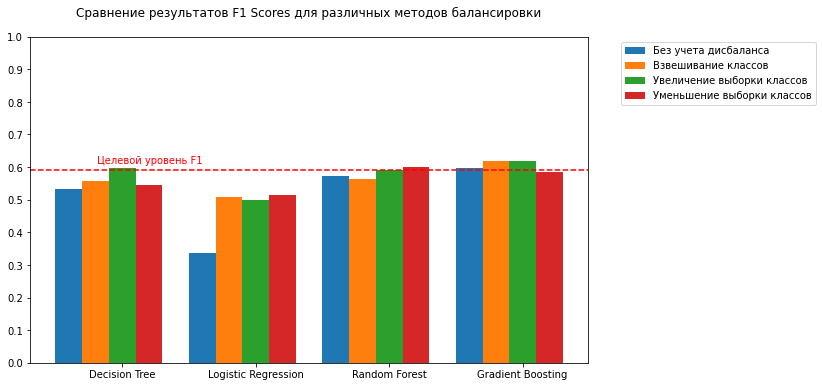

In [45]:
# Создаем список названий моделей
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Создаем списки значений F1 для каждой модели
f1_without_balancing = [f1_tree, f1_logreg, f1_forest, f1_gb]
f1_with_weighting = [f1_tree_weighted, f1_logistic_weighted, f1_forest_weighted_100, f1_boosting_weighted_lr]
f1_with_oversampling = [f1_tree_2, f1_logreg_2, f1_forest_2, f1_gb_2]
f1_with_undersampling = [f1_tree_3, f1_logreg_3, f1_forest_3, f1_gb_3]

# Задаем ширину столбцов
bar_width = 0.2

# Создаем список индексов для каждой модели
index = np.arange(len(models))

# Задаем размер графика
plt.figure(figsize=(10, 6))

# Рисуем столбчатую диаграмму для значений F1 без учета дисбаланса
plt.bar(index, f1_without_balancing, bar_width, label='Без учета дисбаланса')

# Рисуем столбчатую диаграмму для значений F1 с взвешиванием классов
plt.bar(index + bar_width, f1_with_weighting, bar_width, label='Взвешивание классов')

# Рисуем столбчатую диаграмму для значений F1 с увеличенной выборкой
plt.bar(index + 2*bar_width, f1_with_oversampling, bar_width, label='Увеличение выборки классов')

# Рисуем столбчатую диаграмму для значений F1 с уменьшенной выборкой
plt.bar(index + 3*bar_width, f1_with_undersampling, bar_width, label='Уменьшение выборки классов')

# Задаем название графика
# plt.title('Comparison of F1 Scores for Different Balancing Techniques')

# Поднимаем название над графиком на 20 единиц
plt.title('Сравнение результатов F1 Scores для различных методов балансировки', pad=20)

# Задаем пределы осей
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])

# Задаем метки на оси x
plt.xticks(index + 2*bar_width, models)

# Добавляем легенду и выносим ее за пределы графика
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем горизонтальную штриховую линию на уровне 0.59
plt.axhline(y=0.59, color='red', linestyle='--')

# Добавляем описание горизонтальной линии
plt.text(len(models) - 3.0, 0.61, 'Целевой уровень F1', color='red', ha='right')

# Выводим график на экран
plt.show()

 - Построим график для всех значений метрики AUC-ROC

Максимальное значение AUC-ROC: 0.87
Минимальное значение AUC-ROC: 0.78


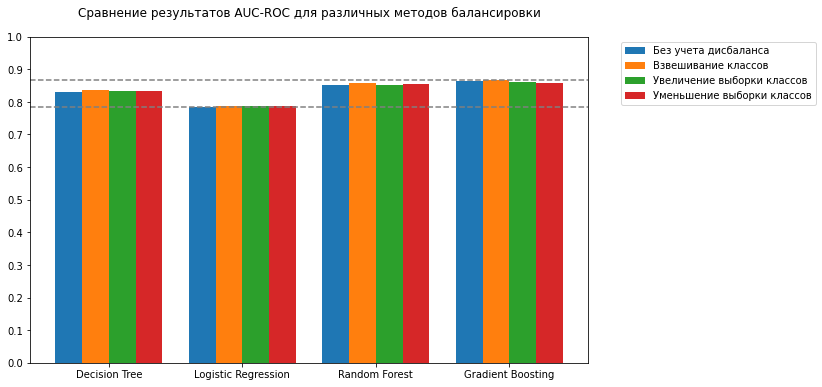

In [46]:
# Создаем список названий моделей
models = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Создаем списки значений AUC-ROC для каждой модели
auc_roc_without_balancing = [auc_roc_tree, auc_roc_logreg, auc_roc_forest, auc_roc_gb]
auc_roc_with_weighting = [auc_roc_tree_weighted, auc_roc_logistic_weighted, 
                          auc_roc_forest_weighted_100, auc_roc_boosting_weighted_lr]
auc_roc_with_oversampling = [auc_roc_tree_2, auc_roc_logreg_2, auc_roc_forest_2, auc_roc_gb_2]
auc_roc_with_undersampling = [auc_roc_tree_3, auc_roc_logreg_3, auc_roc_forest_3, auc_roc_gb_3]

# Задаем ширину столбцов
bar_width = 0.2

# Создаем список индексов для каждой модели
index = np.arange(len(models))

# Задаем размер графика
plt.figure(figsize=(10, 6))

# Рисуем столбчатую диаграмму для значений AUC-ROC без учета дисбаланса
plt.bar(index, auc_roc_without_balancing, bar_width, label='Без учета дисбаланса')

# Рисуем столбчатую диаграмму для значений AUC-ROC с взвешиванием классов
plt.bar(index + bar_width, auc_roc_with_weighting, bar_width, label='Взвешивание классов')

# Рисуем столбчатую диаграмму для значений AUC-ROC с увеличенной выборкой
plt.bar(index + 2*bar_width, auc_roc_with_oversampling, bar_width, label='Увеличение выборки классов')

# Рисуем столбчатую диаграмму для значений AUC-ROC с уменьшенной выборкой
plt.bar(index + 3*bar_width, auc_roc_with_undersampling, bar_width, label='Уменьшение выборки классов')

# Задаем название графика и поднимаем его над графиком на 20 единиц
plt.title('Сравнение результатов AUC-ROC для различных методов балансировки', pad=20)

# Задаем пределы осей
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(11)])

# Задаем метки на оси x
plt.xticks(index + 1.5*bar_width, models)

# Добавляем легенду и выносим ее за пределы графика
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Добавляем горизонтальные штриховые линии на уровне минимального и максимального значения AUC-ROC
min_auc_roc = min(auc_roc_without_balancing + auc_roc_with_weighting 
                  + auc_roc_with_oversampling + auc_roc_with_undersampling)
max_auc_roc = max(auc_roc_without_balancing + auc_roc_with_weighting 
                  + auc_roc_with_oversampling + auc_roc_with_undersampling)
plt.axhline(y=min_auc_roc, color='grey', linestyle='--')
plt.axhline(y=max_auc_roc, color='grey', linestyle='--')

# Выводим на экран значения минимального и максимального AUC-ROC
print(f'Максимальное значение AUC-ROC: {max_auc_roc:.2f}')
print(f'Минимальное значение AUC-ROC: {min_auc_roc:.2f}')

# Выводим график на экран
plt.show()

**Вывод**
<br>Показатели F1-score для всех моделей оказались выше после применения методов балансировки данных. Лучшие результаты показала модель Gradient Boosting, у которой F1-score увеличился с 0.59 до 0.62 при использовании метода oversampling. 

Показатели AUC-ROC также улучшились для всех моделей после балансировки данных. Наибольшее значение AUC-ROC получено на моделях Random Forest и Gradient Boosting, где значение оставалось неизменным - 0.87.

Таким образом, можно сделать вывод, что использование методов балансировки данных позволяет улучшить качество модели и показатели F1-score и AUC-ROC. Наиболее эффективным алгоритмом оказался Gradient Boosting.

## Тестирование модели

In [47]:
# Обучение модели на увеличенной выборке
f1_gb_valid, auc_roc_gb_valid = train_and_evaluate_model(gb_model, features_oversampled, target_oversampled, 
                                                         features_valid_preprocessed, target_valid)

print("Значение F1 для модели Gradient Boosting с увеличенной выборкой на валидационных данных:", f1_gb_valid)
print("Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой на валидационных данных:", auc_roc_gb_valid)
print('')

# Предсказание на тестовых данных
gb_predicted_test = gb_model.predict(features_test_preprocessed)

# Вычисление метрики F1
f1_gb_test = f1_score(target_test, gb_predicted_test)

# Вычисление метрики AUC-ROC
probabilities_test = gb_model.predict_proba(features_test_preprocessed)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_gb_test = roc_auc_score(target_test, probabilities_one_test)

print("Значение F1 для модели Gradient Boosting с увеличенной выборкой на тестовых данных:", f1_gb_test)
print("Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой на тестовых данных:", auc_roc_gb_test)

Значение F1 для модели Gradient Boosting с увеличенной выборкой на валидационных данных: 0.6201298701298701
Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой на валидационных данных: 0.859989344987141

Значение F1 для модели Gradient Boosting с увеличенной выборкой на тестовых данных: 0.6444662095984329
Значение AUC-ROC для модели Gradient Boosting с увеличенной выборкой на тестовых данных: 0.8647066657154409


## Итоговый вывод

В ходе работы над проектом были выполнены следующие шаги:

1. Данные были загружены из CSV-файла и сохранены в переменную `data`. Столбцы были переименованы в строчные символы и "змеиный_регистр" для удобства работы.

2. Был проведен анализ данных на предмет пропущенных значений и дубликатов. Пропущенные значения в столбце "сколько лет человек является клиентом банка" были заменены на 0, обозначив их как новых клиентов. Дубликаты в данных не были обнаружены.

3. Было определено соотношение действующих клиентов банка и ушедших, что позволило выявить дисбаланс классов.

4. Был создан новый датафрейм `data_ml` для машинного обучения, из которого были удалены столбцы-идентификаторы, не представляющие ценности для алгоритма.

5. Данные были разделены на обучающую и тестовую выборки с применением препроцессора для выполнения One-Hot Encoding и масштабирования числовых признаков.

6. Были обучены четыре модели машинного обучения: Дерево решений, Логистическая регрессия, Случайный лес и Градиентный бустинг. Сначала модели были обучены без учета дисбаланса классов, а затем были применены различные методы балансировки классов, такие как взвешивание классов и сэмплинг данных.

7. Была проведена визуализация результатов F1 Scores и AUC-ROC для различных методов балансировки, что позволило сравнить эффективность этих методов.

8. Наилучшая модель была протестирована на тестовой выборке для окончательной оценки ее производительности.

Модель Gradient Boosting с увеличенной выборкой показала следующие результаты на валидационных данных:
- Значение F1-меры составляет 0.620, что находится выше требуемого значения 0.59.
- Значение AUC-ROC составляет 0.860.

На тестовых данных модель Gradient Boosting с увеличенной выборкой показала следующие результаты:
- Значение F1-меры составляет 0.644, что также превышает требуемое значение 0.59.
- Значение AUC-ROC составляет 0.865.

В результате было установлено, что модель Градиентного бустинга показала наилучшие результаты по метрикам F1 и AUC-ROC при использовании метода увеличения выборки для балансировки классов. Эта модель может быть использована для предсказания оттока клиентов банка.

Рекомендации:
- Предоставленная модель может использоваться для прогнозирования ухода клиентов из банка.
- Рекомендуется провести дополнительные исследования и тестирования для уточнения качества модели, чтобы быть уверенными в ее результативности на реальных данных.
